# Final Project - Lainie Cederholm, Will Novak, Ian Pompliano

**Part 1: Scrape top 50 songs of each year (1960 to present) from Billboard Year-End Hot 100 singles (Wikipedia)**

In [3]:
import requests
from bs4 import BeautifulSoup

# function to scrape top 50 songs for a given year
def scrapeBillboardYear(year):
    url = f"https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{year}"
    response = requests.get(url)
    
    # takes HTML content of web-page and parses it using parser provided by BeautifulSoup 
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # takes first table from given page (the table we are interested in)
    tables = soup.find_all('table', class_='wikitable')
    songsTable = tables[0]
    
    # excludes first row containing headers
    rows = songsTable.find_all('tr')[1:]
    
    # initialize list of top songs
    topSongs = []
    
    # iterates through first 50 songs and appends song list
    for row in rows[:2]:  
            columns = row.find_all(['td', 'th'])
            songInfo = [col.get_text(strip=False) for col in columns]
            topSongs.append(songInfo)
            
    return topSongs

In [4]:
# create lists that will hold all song data for each decade
list1960s = []
list1970s = []
list1980s = []
list1990s = []
list2000s = []
list2010s = []

# append respective lists with song/artist data 
for year in range(1960, 1970):
    yearData = scrapeBillboardYear(year)
    for data in yearData:
        list1960s.append(data)
for year in range(1970, 1980):
    yearData = scrapeBillboardYear(year)
    for data in yearData:
        list1970s.append(data)
for year in range(1980, 1990):
    yearData = scrapeBillboardYear(year)
    for data in yearData:
        list1980s.append(data)
for year in range(1990, 2000):
    yearData = scrapeBillboardYear(year)
    for data in yearData:
        list1990s.append(data)
for year in range(2000, 2010):
    yearData = scrapeBillboardYear(year)
    for data in yearData:
        list2000s.append(data)
for year in range(2010, 2020):
    yearData = scrapeBillboardYear(year)
    for data in yearData:
        list2010s.append(data)

**Part 2: Now that we have our song/artist data neatly stored in lists for each decade, we can retrieve lyrics for each song from the genius API.**

In [32]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_string(text):
    # Remove the first line
    cleaned_text = '\n'.join(text.split('\n')[1:])
    
    # Remove characters within brackets
    cleaned_text = re.sub(r'\[.*?\]', '', cleaned_text)
    
    # Remove everything except a-z english letters
    regex = re.compile('[^a-zA-Z]')
    cleaned_text = regex.sub(' ', cleaned_text)
    
    # Remove extra spaces
    clean_text = re.sub(' +', ' ', cleaned_text).lower()
    
    new_text = ""
    
    for word in word_tokenize(clean_text):
        if word.lower() not in stop_words and len(word) >= 3 and "embed" not in word:
            new_text += lemmatizer.lemmatize(word.lower()) + " "
    
    return new_text

[nltk_data] Downloading package punkt to /Users/wnovak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wnovak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import lyricsgenius

# create an instance of the Genius API (using given access token)
genius = lyricsgenius.Genius("5b5PhvCQxiBbHpKVRH4V7_O4bb-o6UNhUkDg35VvSxmFa-wdoGTsgCinzcrLiIn1", timeout=30)

dict1960s = {}
dict1970s = {}
dict1980s = {}
dict1990s = {}
dict2000s = {}
dict2010s = {}

for i in range(len(list1960s)):
    if len(list1960s[i]) != 3:
        list1960s[i].append(list1960s[i-1][2])
    song = genius.search_song(list1960s[i][1], list1960s[i][2])
    try:
        lyricsClean = clean_string(song.lyrics)
    except:
        continue
    dict1960s[list1960s[i][1]] = lyricsClean
    
for i in range(len(list1970s)):
    if len(list1970s[i]) != 3:
        list1970s[i].append(list1970s[i-1][2])
    song = genius.search_song(list1970s[i][1], list1970s[i][2])
    try:
        lyricsClean = clean_string(song.lyrics)
    except:
        continue
    dict1970s[list1970s[i][1]] = lyricsClean
    
for i in range(len(list1980s)):
    if len(list1980s[i]) != 3:
        list1980s[i].append(list1980s[i-1][2])
    song = genius.search_song(list1980s[i][1], list1980s[i][2])
    try:
        lyricsClean = clean_string(song.lyrics)
    except:
        continue
    dict1980s[list1980s[i][1]] = lyricsClean

    
for i in range(len(list1990s)):
    if len(list1990s[i]) != 3:
        list1990s[i].append(list1990s[i-1][2])
    song = genius.search_song(list1990s[i][1], list1990s[i][2])
    try:
        lyricsClean = clean_string(song.lyrics)
    except:
        continue
    dict1990s[list1990s[i][1]] = lyricsClean

    
for i in range(len(list2000s)):
    if len(list2000s[i]) != 3:
        list2000s[i].append(list2000s[i-1][2])
    song = genius.search_song(list2000s[i][1], list2000s[i][2])
    try:
        lyricsClean = clean_string(song.lyrics)
    except:
        continue
    dict2000s[list2000s[i][1]] = lyricsClean

    
for i in range(len(list2010s)):
    if len(list2010s[i]) != 3:
        list2010s[i].append(list2010s[i-1][2])
    song = genius.search_song(list2010s[i][1], list2010s[i][2])
    try:
        lyricsClean = clean_string(song.lyrics)
    except:
        continue
    dict2010s[list2010s[i][1]] = lyricsClean

Searching for ""Theme from A Summer Place"" by Percy Faith
...
Done.
Searching for ""He'll Have to Go"" by Jim Reeves
...
Done.
Searching for ""Tossin' and Turnin'"" by Bobby Lewis
...
Done.
Searching for ""I Fall to Pieces"" by Patsy Cline
...
Done.
Searching for ""Stranger on the Shore"" by Acker Bilk
...
Specified song does not contain lyrics. Rejecting.
Searching for ""I Can't Stop Loving You"" by Ray Charles
...
Done.
Searching for ""Surfin' U.S.A."" by The Beach Boys
...
Done.
Searching for ""The End of the World"" by Skeeter Davis
...
Done.
Searching for ""I Want to Hold Your Hand"" by The Beatles
...
Done.
Searching for ""She Loves You"
" by The Beatles
...
Done.
Searching for ""Wooly Bully"" by Sam the Sham and the Pharaohs
...
Done.
Searching for ""I Can't Help Myself (Sugar Pie Honey Bunch)"" by Four Tops
...
Done.
Searching for ""California Dreamin'"" by The Mamas & the Papas
...
Done.
Searching for ""96 Tears"" by ? and the Mysterians
...
Done.
Searching for ""To Sir With 

In [16]:
import pandas as pd
#create dfs
df1960s = pd.DataFrame.from_dict(dict1960s, orient='index', columns=['Lyrics'])
df1960s.to_csv('df1960s.csv')
df1970s = pd.DataFrame.from_dict(dict1970s, orient='index', columns=['Lyrics'])
df1970s.to_csv('df1970s.csv')
df1980s = pd.DataFrame.from_dict(dict1980s, orient='index', columns=['Lyrics'])
df1980s.to_csv('df1980s.csv')
df1990s = pd.DataFrame.from_dict(dict1990s, orient='index', columns=['Lyrics'])
df1990s.to_csv('df1990s.csv')
df2000s = pd.DataFrame.from_dict(dict2000s, orient='index', columns=['Lyrics'])
df2000s.to_csv('df2000s.csv')
df2010s = pd.DataFrame.from_dict(dict2010s, orient='index', columns=['Lyrics'])
df2010s.to_csv('df2010s.csv')

In [48]:
df1960s = pd.read_csv('df1960s.csv', index_col=0)
df1970s = pd.read_csv('df1970s.csv', index_col=0)
df1980s = pd.read_csv('df1980s.csv', index_col=0)
df1990s = pd.read_csv('df1990s.csv', index_col=0)
df2000s = pd.read_csv('df2000s.csv', index_col=0)
df2010s = pd.read_csv('df2010s.csv', index_col=0)

**Generate Word Clouds for each decade**

In [18]:
string1960s = ""
string1970s = ""
string1980s = ""
string1990s = ""
string2000s = ""
string2010s = ""
for lyrics in df1960s['Lyrics']:
    string1960s += lyrics
for lyrics in df1970s['Lyrics']:
    string1970s += lyrics
for lyrics in df1980s['Lyrics']:
    string1980s += lyrics
for lyrics in df1990s['Lyrics']:
    string1990s += lyrics
for lyrics in df2000s['Lyrics']:
    string2000s += lyrics
for lyrics in df2010s['Lyrics']:
    string2010s += lyrics

(-0.5, 399.5, 199.5, -0.5)

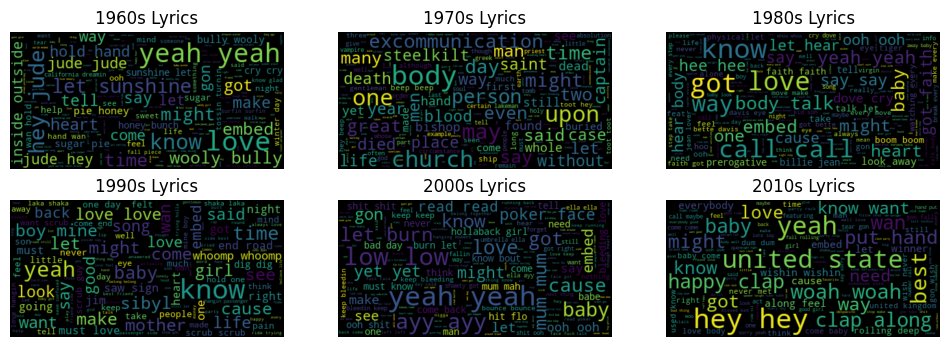

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
        
    
plt.figure(figsize = (12,4))
wc1960s = WordCloud(max_font_size=40).generate(string1960s)
plt.subplot(2, 3, 1)
plt.title("1960s Lyrics")
plt.imshow(wc1960s, interpolation="bilinear")
plt.axis("off")

wc1970s = WordCloud(max_font_size=40).generate(string1970s)
plt.subplot(2, 3, 2)
plt.title("1970s Lyrics")
plt.imshow(wc1970s, interpolation="bilinear")
plt.axis("off")

wc1980s = WordCloud(max_font_size=40).generate(string1980s)
plt.subplot(2, 3, 3)
plt.title("1980s Lyrics")
plt.imshow(wc1980s, interpolation="bilinear")
plt.axis("off")

wc1990s = WordCloud(max_font_size=40).generate(string1990s)
plt.subplot(2, 3, 4)
plt.title("1990s Lyrics")
plt.imshow(wc1990s, interpolation="bilinear")
plt.axis("off")

wc2000s = WordCloud(max_font_size=40).generate(string2000s)
plt.subplot(2, 3, 5)
plt.title("2000s Lyrics")
plt.imshow(wc2000s, interpolation="bilinear")
plt.axis("off")

wc2010s = WordCloud(max_font_size=40).generate(string2010s)
plt.subplot(2, 3, 6)
plt.title("2010s Lyrics")
plt.imshow(wc2010s, interpolation="bilinear")
plt.axis("off")

**Perform Sentiment Analysis on each song**

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

sentiment1960s = []
for lyrics in df1960s['Lyrics']:
    sentiment1960s.append(analyzer.polarity_scores(lyrics))

pos1960s = []
neg1960s = []
neu1960s = []
for sentiment in sentiment1960s:
    pos1960s.append(sentiment["pos"])
    neg1960s.append(sentiment["neg"])
    neu1960s.append(sentiment["neu"])

sentiment1970s = []
for lyrics in df1970s['Lyrics']:
    sentiment1970s.append(analyzer.polarity_scores(lyrics))    
    
pos1970s = []
neg1970s = []
neu1970s = []
for sentiment in sentiment1970s:
    pos1970s.append(sentiment["pos"])
    neg1970s.append(sentiment["neg"])
    neu1970s.append(sentiment["neu"])

sentiment1980s = []
for lyrics in df1980s['Lyrics']:
    sentiment1980s.append(analyzer.polarity_scores(lyrics))    
    
pos1980s = []
neg1980s = []
neu1980s = []
for sentiment in sentiment1980s:
    pos1980s.append(sentiment["pos"])
    neg1980s.append(sentiment["neg"])
    neu1980s.append(sentiment["neu"])

sentiment1990s = []
for lyrics in df1990s['Lyrics']:
    sentiment1990s.append(analyzer.polarity_scores(lyrics))    
    
pos1990s = []
neg1990s = []
neu1990s = []
for sentiment in sentiment1990s:
    pos1990s.append(sentiment["pos"])
    neg1990s.append(sentiment["neg"])
    neu1990s.append(sentiment["neu"])

sentiment2000s = []
for lyrics in df2000s['Lyrics']:
    sentiment2000s.append(analyzer.polarity_scores(lyrics))    
    
pos2000s = []
neg2000s = []
neu2000s = []
for sentiment in sentiment2000s:
    pos2000s.append(sentiment["pos"])
    neg2000s.append(sentiment["neg"])
    neu2000s.append(sentiment["neu"])

sentiment2010s = []
for lyrics in df2010s['Lyrics']:
    sentiment2010s.append(analyzer.polarity_scores(lyrics))   
    
pos2010s = []
neg2010s = []
neu2010s = []
for sentiment in sentiment2010s:
    pos2010s.append(sentiment["pos"])
    neg2010s.append(sentiment["neg"])
    neu2010s.append(sentiment["neu"])

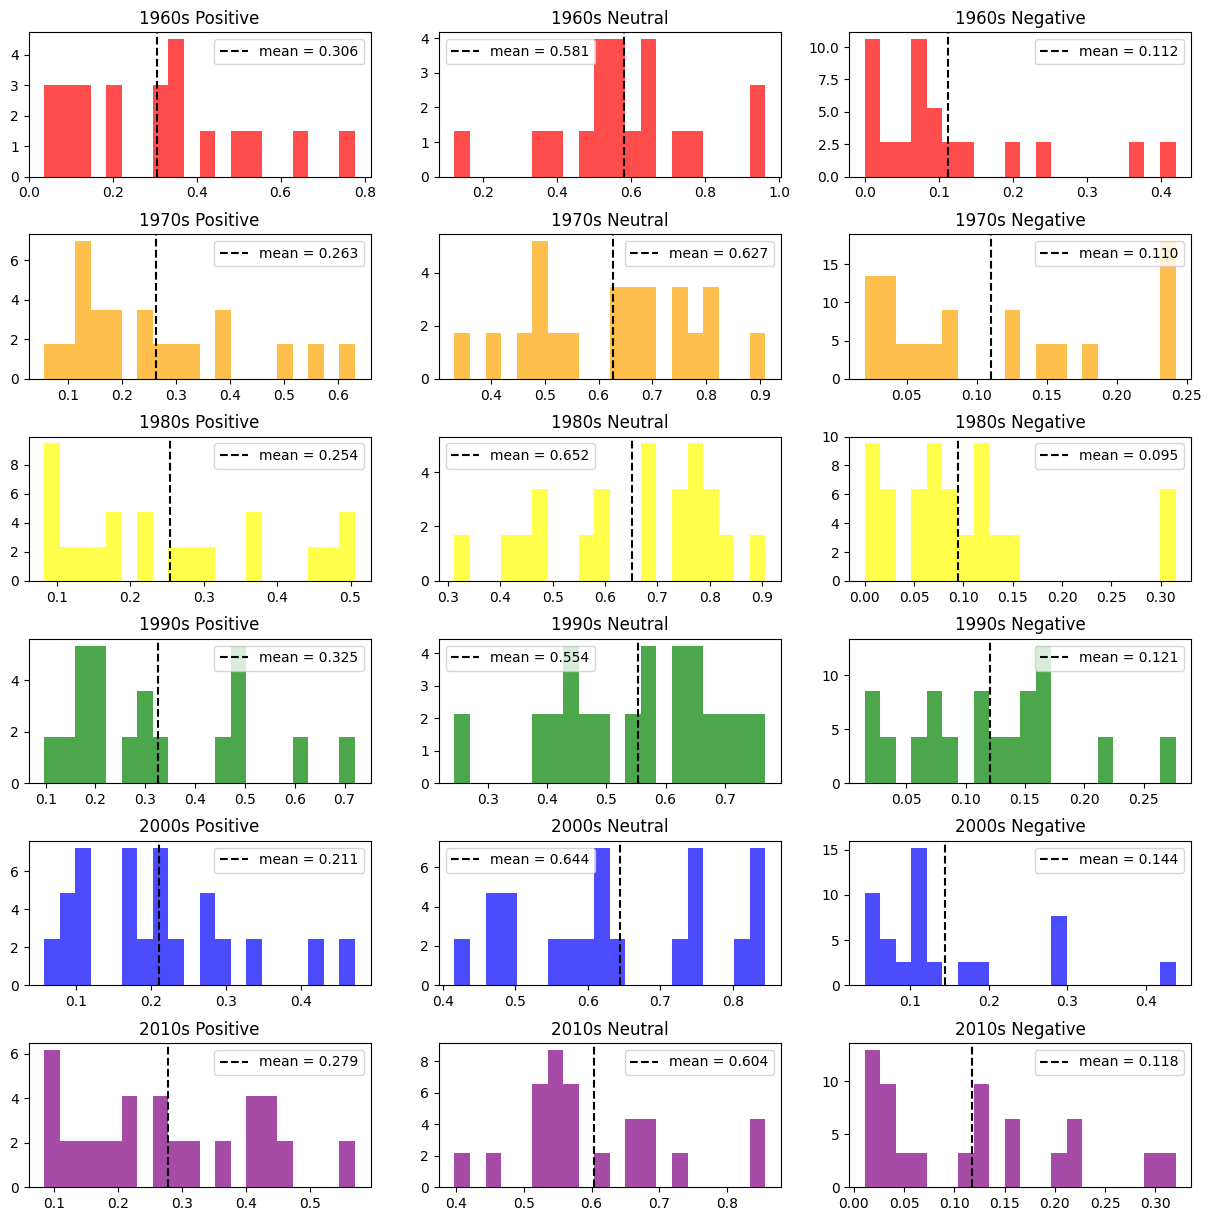

In [40]:
fig, axs = plt.subplots(6, 3, figsize = (15, 15))

axs[0,0].hist(pos1960s, bins=20, color='red', alpha=0.7, density=True)
axs[0,0].set_title('1960s Positive')
mean1 = sum(pos1960s)/len(pos1960s)
axs[0,0].axvline(mean1,0,12, color='black', linestyle='--', label= f"mean = {mean1:.3f}")
axs[0,0].legend()

axs[0,1].hist(neu1960s, bins=20, color='red', alpha=0.7, density=True)
axs[0,1].set_title('1960s Neutral')
mean2 = sum(neu1960s)/len(neu1960s)
axs[0,1].axvline(mean2,0,12, color='black', linestyle='--', label=f"mean = {mean2:.3f}")
axs[0,1].legend()

axs[0,2].hist(neg1960s, bins=20, color='red', alpha=0.7, density=True)
axs[0,2].set_title('1960s Negative')
mean3 = sum(neg1960s)/len(neg1960s)
axs[0,2].axvline(mean3,0,12, color='black', linestyle='--', label=f"mean = {mean3:.3f}")
axs[0,2].legend()

axs[1,0].hist(pos1970s, bins=20, color='orange', alpha=0.7, density=True)
axs[1,0].set_title('1970s Positive')
mean4 = sum(pos1970s)/len(pos1970s)
axs[1,0].axvline(mean4,0,12, color='black', linestyle='--', label=f"mean = {mean4:.3f}")
axs[1,0].legend()

axs[1,1].hist(neu1970s, bins=20, color='orange', alpha=0.7, density=True)
axs[1,1].set_title('1970s Neutral')
mean5 = sum(neu1970s)/len(neu1970s)
axs[1,1].axvline(mean5,0,12, color='black', linestyle='--', label=f"mean = {mean5:.3f}")
axs[1,1].legend()

axs[1,2].hist(neg1970s, bins=20, color='orange', alpha=0.7, density=True)
axs[1,2].set_title('1970s Negative')
mean6 = sum(neg1970s)/len(neg1970s)
axs[1,2].axvline(mean6,0,12, color='black', linestyle='--', label=f"mean = {mean6:.3f}")
axs[1,2].legend()

axs[2,0].hist(pos1980s, bins=20, color='yellow', alpha=0.7, density=True)
axs[2,0].set_title('1980s Positive')
mean7 = sum(pos1980s)/len(pos1980s)
axs[2,0].axvline(mean7,0,12, color='black', linestyle='--', label=f"mean = {mean7:.3f}")
axs[2,0].legend()

axs[2,1].hist(neu1980s, bins=20, color='yellow', alpha=0.7, density=True)
axs[2,1].set_title('1980s Neutral')
mean8 = sum(neu1980s)/len(neu1980s)
axs[2,1].axvline(mean8,0,12, color='black', linestyle='--', label=f"mean = {mean8:.3f}")
axs[2,1].legend()

axs[2,2].hist(neg1980s, bins=20, color='yellow', alpha=0.7, density=True)
axs[2,2].set_title('1980s Negative')
mean9 = sum(neg1980s)/len(neg1980s)
axs[2,2].axvline(mean9,0,12, color='black', linestyle='--', label=f"mean = {mean9:.3f}")
axs[2,2].legend()

axs[3,0].hist(pos1990s, bins=20, color='green', alpha=0.7, density=True)
axs[3,0].set_title('1990s Positive')
mean10 = sum(pos1990s)/len(pos1990s)
axs[3,0].axvline(mean10,0,12, color='black', linestyle='--', label=f"mean = {mean10:.3f}")
axs[3,0].legend()

axs[3,1].hist(neu1990s, bins=20, color='green', alpha=0.7, density=True)
axs[3,1].set_title('1990s Neutral')
mean11 = sum(neu1990s)/len(neu1990s)
axs[3,1].axvline(mean11,0,12, color='black', linestyle='--', label=f"mean = {mean11:.3f}")
axs[3,1].legend()

axs[3,2].hist(neg1990s, bins=20, color='green', alpha=0.7, density=True)
axs[3,2].set_title('1990s Negative')
mean12 = sum(neg1990s)/len(neg1990s)
axs[3,2].axvline(mean12,0,12, color='black', linestyle='--', label=f"mean = {mean12:.3f}")
axs[3,2].legend()

axs[4,0].hist(pos2000s, bins=20, color='blue', alpha=0.7, density=True)
axs[4,0].set_title('2000s Positive')
mean13 = sum(pos2000s)/len(pos2000s)
axs[4,0].axvline(mean13,0,12, color='black', linestyle='--', label=f"mean = {mean13:.3f}")
axs[4,0].legend()

axs[4,1].hist(neu2000s, bins=20, color='blue', alpha=0.7, density=True)
axs[4,1].set_title('2000s Neutral')
mean14 = sum(neu2000s)/len(neu2000s)
axs[4,1].axvline(mean14,0,12, color='black', linestyle='--', label=f"mean = {mean14:.3f}")
axs[4,1].legend()

axs[4,2].hist(neg2000s, bins=20, color='blue', alpha=0.7, density=True)
axs[4,2].set_title('2000s Negative')
mean15 = sum(neg2000s)/len(neg2000s)
axs[4,2].axvline(mean15,0,12, color='black', linestyle='--', label=f"mean = {mean15:.3f}")
axs[4,2].legend()

axs[5,0].hist(pos2010s, bins=20, color='purple', alpha=0.7, density=True)
axs[5,0].set_title('2010s Positive')
mean16 = sum(pos2010s)/len(pos2010s)
axs[5,0].axvline(mean16,0,12, color='black', linestyle='--', label=f"mean = {mean16:.3f}")
axs[5,0].legend()

axs[5,1].hist(neu2010s, bins=20, color='purple', alpha=0.7, density=True)
axs[5,1].set_title('2010s Neutral')
mean17 = sum(neu2010s)/len(neu2010s)
axs[5,1].axvline(mean17,0,12, color='black', linestyle='--', label=f"mean = {mean17:.3f}")
axs[5,1].legend()

axs[5,2].hist(neg2010s, bins=20, color='purple', alpha=0.7, density=True)
axs[5,2].set_title('2010s Negative')
mean18 = sum(neg2010s)/len(neg2010s)
axs[5,2].axvline(mean18,0,12, color='black', linestyle='--', label=f"mean = {mean18:.3f}")
axs[5,2].legend()

plt.subplots_adjust(hspace=0.4)

**Model**

In [42]:
def data_cleaning(decade):
    songs = []
    for index, row in decade.iterrows():
        cur_song = word_tokenize(row['Lyrics'])
        songs.append(cur_song)
    return songs

In [43]:
corpus1960s = data_cleaning(df1960s)
corpus1970s = data_cleaning(df1970s)
corpus1980s = data_cleaning(df1980s)
corpus1990s = data_cleaning(df1990s)
corpus2000s = data_cleaning(df2000s)
corpus2010s = data_cleaning(df2010s)